In [3]:
import matplotlib.pyplot as plt
import numpy as np

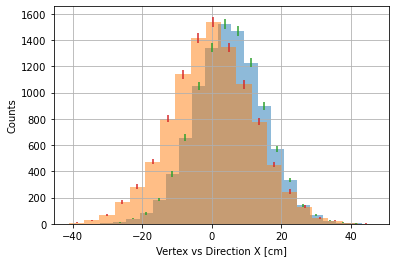

In [13]:
x = np.random.normal(loc=5.0, scale=10.0, size=10000)
y = np.random.normal(loc=0.0, scale=12.0, size=10000)
 
def generic_histogram2(x, x2, x_name, output_path, range=None, bins=None, in_chain=False):
    #fig, ax = plt.subplots()
    plt.hist(x, bins=bins, range=range,  alpha=0.5, histtype='stepfilled')
    plt.hist(x2, bins=bins, range=range,  alpha=0.5, histtype='stepfilled')
    plt.xlabel(x_name)
    
    y,binEdges = np.histogram(x,bins=bins, )
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    menStd     = np.sqrt(y)
    width      = 0.05
    
    y2,binEdges2 = np.histogram(x2,bins=bins, )
    bincenters2 = 0.5*(binEdges2[1:]+binEdges2[:-1])
    menStd2     = np.sqrt(y2)
    
    plt.grid()
    plt.ylabel('Counts')
    
    if not in_chain:
        plt.errorbar(bincenters, y, yerr=menStd, fmt = ' ')
        plt.errorbar(bincenters2, y2, yerr=menStd2, fmt=' ')
        plt.plot()
        
generic_histogram2(x, y, 'Vertex vs Direction X [cm]', 'vertex vs direction X', bins = 20)

#plt.savefig('asfd.png')

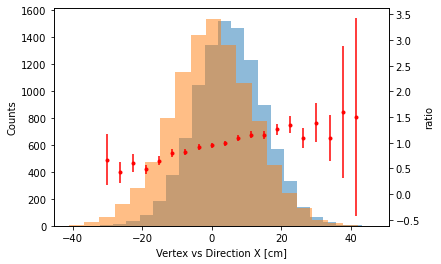

In [14]:
def generic_histogram_ratio(x, x2, x_name, output_path, y_name = None,  range=None, bins=None, in_chain=False):
    
    fig, ax1 = plt.subplots()

    
    val_of_bins_x1, edges_of_bins_x1, patches_x1 = ax1.hist(x, bins=bins, range=range,  alpha=0.5, histtype='stepfilled')
    val_of_bins_x2, edges_of_bins_x2, patches_x2 = ax1.hist(x2, bins=bins, range=range,  alpha=0.5, histtype='stepfilled')
    print(patches_x1)
    
 
    
    ax2 = ax1.twinx()
    
    ax1.set_xlabel(x_name)

    ratio = np.divide(val_of_bins_x1,
                  val_of_bins_x2,
                  where=(val_of_bins_x2 != 0))
    #print("ratio:", ratio)

    error = np.divide(val_of_bins_x1 * np.sqrt(val_of_bins_x2) + val_of_bins_x2 * np.sqrt(val_of_bins_x1),
                  np.power(val_of_bins_x2, 2),
                  where=(val_of_bins_x2 != 0))    
    
    #print("error:", error)
    bincenter = 0.5 * (edges_of_bins_x1[1:] + edges_of_bins_x1[:-1])
    ax2.errorbar(bincenter, ratio, yerr=error, fmt='.', color='r')
    
    ax1.set_ylabel('Counts')
    ax2.set_ylabel('ratio')
    if not in_chain:
        plt.plot()
        
generic_histogram_ratio(x, y, 'Vertex vs Direction X [cm]', 'vertex vs direction X', bins = 20)

#plt.savefig('asfd.png')

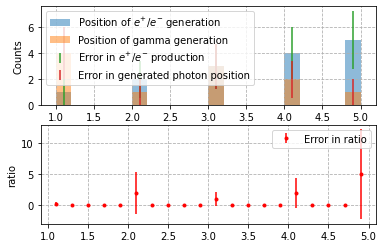

In [6]:
def generic_histogram_ratio(x, x2, x_name, output_path, y_name = None,  range=None, bins=None, in_chain=False):
    
    fig, (ax1, ax2) = plt.subplots(2)

    
    val_of_bins_x1, edges_of_bins_x1, patches_x1 = ax1.hist(x, bins=bins, range=range,  alpha=0.5, histtype='stepfilled', label = 'Position of $e^{+}/e^{-}$ generation')
    val_of_bins_x2, edges_of_bins_x2, patches_x2 = ax1.hist(x2, bins=bins, range=range,  alpha=0.5, histtype='stepfilled', label = 'Position of gamma generation')
    
    y,binEdges = np.histogram(x,bins=bins,)
    y2,binEdges2 = np.histogram(x2,bins=bins,)
    

    #ax2 = ax1.twinx()
    
    menStd     = np.sqrt(y)
    width      = 0.05   
    
    ax1.set_xlabel(x_name)

    ratio = np.divide(val_of_bins_x1,
                  val_of_bins_x2,
                  where=(val_of_bins_x2 != 0))
    #print("ratio:", ratio)

    error = np.divide(val_of_bins_x1 * np.sqrt(val_of_bins_x2) + val_of_bins_x2 * np.sqrt(val_of_bins_x1),
                  np.power(val_of_bins_x2, 2),
                  where=(val_of_bins_x2 != 0))    
    
    #print("error:", error)
    bincenter = 0.5 * (edges_of_bins_x1[1:] + edges_of_bins_x1[:-1])
    bincenter2 = 0.5 * (edges_of_bins_x2[1:] + edges_of_bins_x2[:-1])
    #bincenters2 = 0.5*(binEdges2[1:]+binEdges2[:-1])
    menStd2     = np.sqrt(y2)
    
    ax2.errorbar(bincenter, ratio, yerr=error, fmt='.', color='r', label = 'Error in ratio')
    
    ax1.set_ylabel('Counts')
    ax2.set_ylabel('ratio')
    ax1.grid(linestyle = '--')
    ax2.grid(linestyle = '--')
    
    if not in_chain:
        ax1.errorbar(bincenter, y, yerr=menStd, fmt = ' ', label = 'Error in $e^{+}/e^{-}$ production')
        ax1.errorbar(bincenter2, y2, yerr=menStd2, fmt=' ', label = 'Error in generated photon position')
        ax1.legend(loc = 'best')
        ax2.legend(loc = 'best')
        plt.plot()
        
        
generic_histogram_ratio(x, y, 'Vertex vs Direction X [cm]', 'vertex vs direction X', bins = 20)
